In [329]:
import numpy as np
import matplotlib.pyplot as plt
from gatspy.periodic import LombScargle, LombScargleFast

In [485]:
timeb=np.loadtxt("timestamps_blue",unpack=True)

In [486]:
time,f,errf=np.loadtxt("forced.dat",unpack=True,usecols=(0,3,4))

<ErrorbarContainer object of 3 artists>

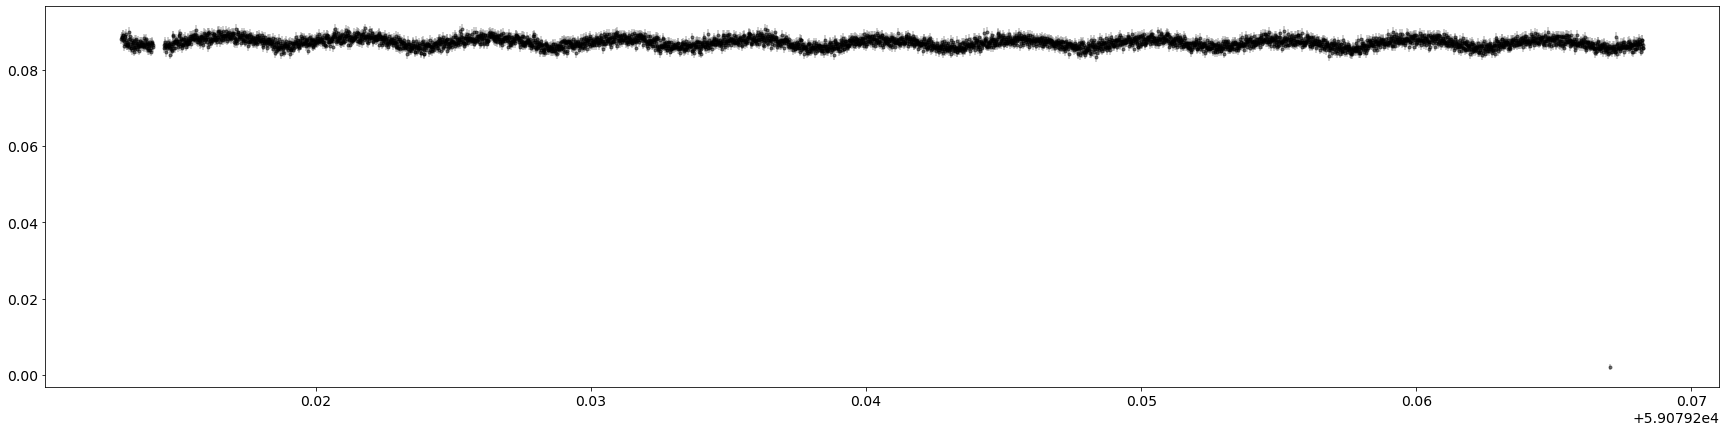

In [487]:
plt.figure(figsize=(30,7))
plt.errorbar(time, f, errf, fmt='.k', ecolor='gray', alpha=0.5)

In [488]:
time=time[f>0.02]
errf=errf[f>0.02]
timeb=timeb[f>0.02]
f=f[f>0.02]

In [489]:
model = LombScargle(fit_period=True)
model.optimizer.period_range = (0.001, 0.01)
model.fit(timeb,f,errf)

Finding optimal frequency:
 - Estimated peak width = 114
 - Using 5 steps per peak; omega_step = 22.7
 - User-specified period range:  0.001 to 0.01
 - Computing periods at 250 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


In [490]:
model.best_period

0.004812155820461325

In [491]:
f

array([0.08797317, 0.08848546, 0.08825357, ..., 0.08659169, 0.08576587,
       0.08561508])

In [492]:
errf=errf/np.mean(f)
f=f/np.mean(f)

In [493]:
phase=(time/(model.best_period)) %1
phase2=(time/(model.best_period*2)) %1

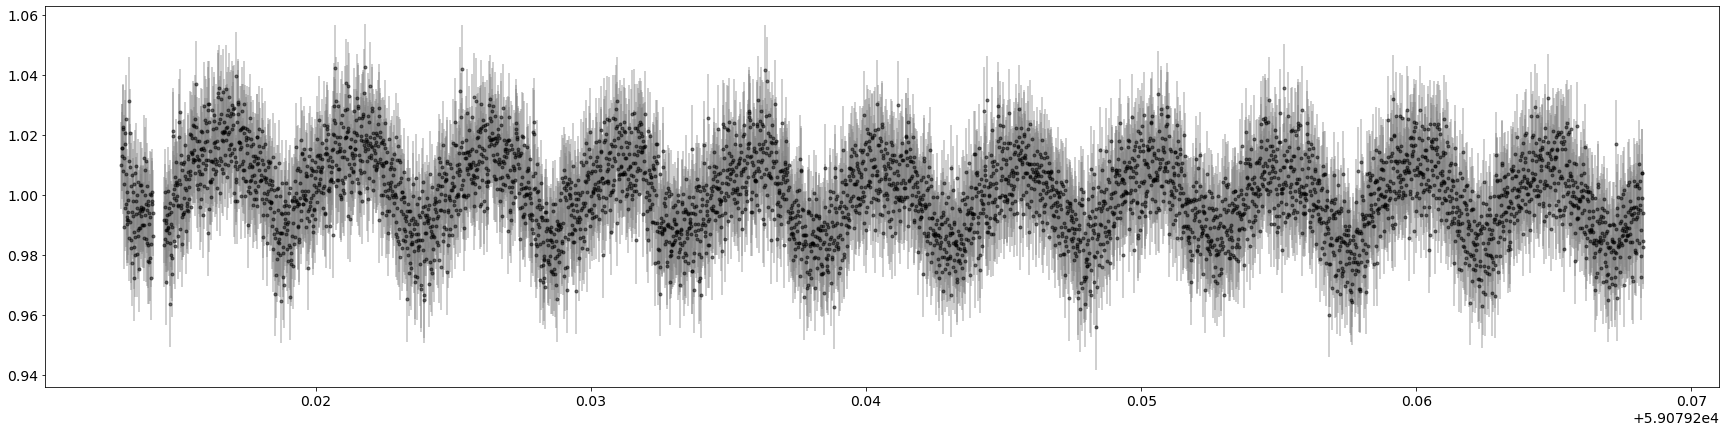

In [494]:
plt.figure(figsize=(30,7))
plt.errorbar(time, f, errf, fmt='.k', ecolor='gray', alpha=0.5)
plt.savefig("Unfolded.pdf",bbox_inches='tight')

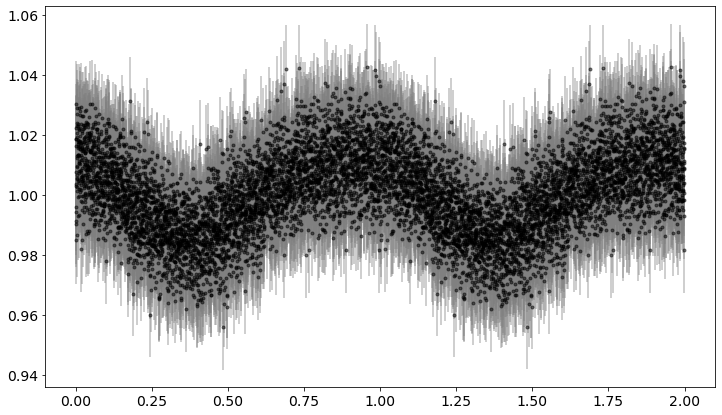

In [495]:
plt.figure(figsize=(12,7))
plt.errorbar(phase, f, errf, fmt='.k', ecolor='gray', alpha=0.5)
plt.errorbar(phase+1, f, errf/np.median(f), fmt='.k', ecolor='gray', alpha=0.5)
#plt.ylim(2.6,2.7)
plt.savefig("Folded.pdf",bbox_inches='tight')

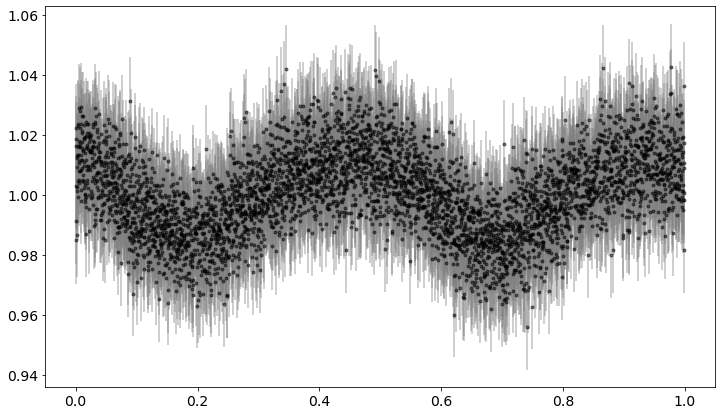

In [496]:
plt.figure(figsize=(12,7))
plt.errorbar(phase2, f, errf, fmt='.k', ecolor='gray', alpha=0.5)
plt.savefig("Folded_twice.pdf",bbox_inches='tight')

In [773]:
bins=np.linspace(0,1,55)
phase1= ((timeb-59079.21729018184)/(0.004817623604595463)) %1
#phase2= ((timeg-time[0])/(model.best_period*2)) %1
binsmid,tf,etf=[],[],[]
for i in range(len(bins)-1):
    #print((bins[i+1]-bins[i])/2+bins[i])
    binsmid.append((bins[i+1]-bins[i])/2+bins[i])
    f1= f[(phase1>bins[i])&(phase1<bins[i+1])]
    ef1=errf[(phase1>bins[i])&(phase1<bins[i+1])]
    tf.append(np.mean(f1))
    etf.append(np.sqrt(np.sum(ef1**2))/len(ef1))

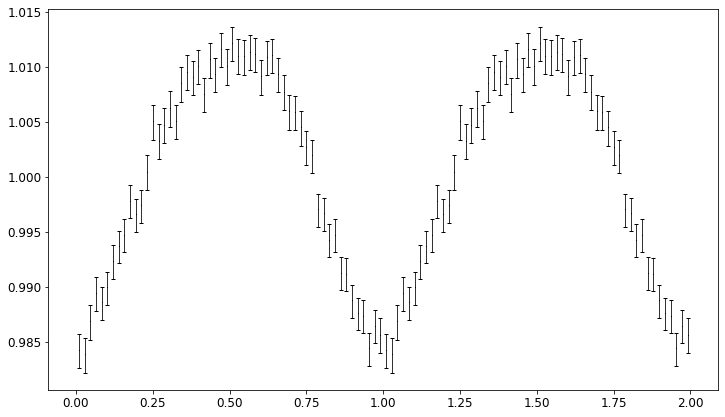

In [774]:
plt.figure(figsize=(12,7))
plt.errorbar(binsmid, tf, etf, fmt=',k', elinewidth=0.8,capsize=2)
plt.errorbar(np.array(binsmid)+1, tf, etf, fmt=',k',elinewidth=0.8,capsize=2)
plt.savefig("Binned.pdf",bbox_inches='tight')

In [344]:
bins=np.linspace(0,1,100)
phase22= ((time-time[0])/(model.best_period*2)) %1
#phase2= ((timeg-time[0])/(model.best_period*2)) %1
binsmid,tf,etf=[],[],[]
for i in range(len(bins)-1):
    #print((bins[i+1]-bins[i])/2+bins[i])
    binsmid.append((bins[i+1]-bins[i])/2+bins[i])
    f1= f[(phase22>bins[i])&(phase22<bins[i+1])]
    ef1=errf[(phase22>bins[i])&(phase22<bins[i+1])]
    tf.append(np.mean(f1))
    etf.append(np.sqrt(np.sum(ef1**2))/len(ef1))

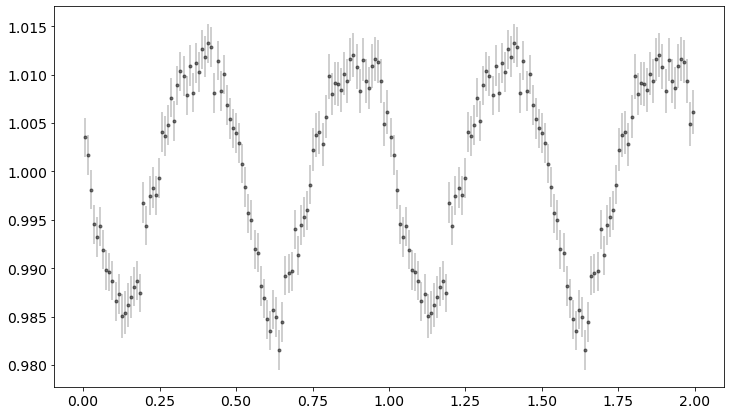

In [345]:
plt.figure(figsize=(12,7))
plt.errorbar(binsmid, tf, etf, fmt='.k', ecolor='gray', alpha=0.5)
plt.errorbar(np.array(binsmid)+1, tf, etf, fmt='.k', ecolor='gray', alpha=0.5)
plt.savefig("Binned_twice.pdf",bbox_inches='tight')

In [346]:
1/model.best_period

207.80706970210565

4699 1.1772485273515806e-05 1.1581301805563271e-05 0.05531890830025077 0.05531890830025077


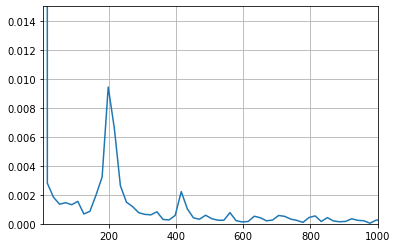

(4699, 2349)

In [50]:
from scipy import fft
# Number of sample points
N = len(f)
# sample spacing
T=(time[-1]-time[0])/(len(f))
print(N,T,time[1]-time[0],N*T,time[-1]-time[0])
#T = 1.0 / 800.0
#x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(f)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim(5,1000)
plt.ylim(0,0.015)
plt.show()
len(yf),N//2

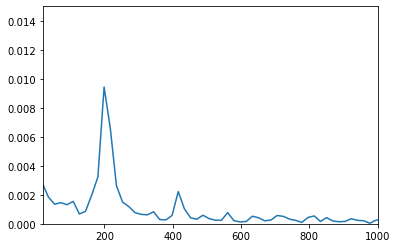

In [51]:
plt.plot(xf, 2.0/N * np.abs(np.fft.fft(f)[0:N//2]))
plt.xlim(20,1000)
plt.ylim(0,0.015)
plt.show()

In [45]:
xf2 = np.linspace(0.0, 1.0/(T), N)
np.argmax(np.abs(yf[(xf2>20) & (xf2<1000)]))

NameError: name 'T' is not defined

In [46]:
len(xf2[(xf2<20)])

NameError: name 'xf2' is not defined

In [47]:
xf[11]

NameError: name 'xf' is not defined

In [347]:
rtime,rf,rerrf=np.loadtxt("forced_red.dat",unpack=True,usecols=(0,3,4))

In [348]:
timer=np.loadtxt("Timestamps_Red",unpack=True)

In [349]:
len(rtime),rtime, len(timer), timer

(4700, array([59079.21297321, 59079.21298479, 59079.21299638, ...,
        59079.26822899, 59079.26824058, 59079.26825217]), 4700, array([59079.21608082, 59079.21609241, 59079.216104  , ...,
        59079.2713388 , 59079.27135039, 59079.27136198]))

<ErrorbarContainer object of 3 artists>

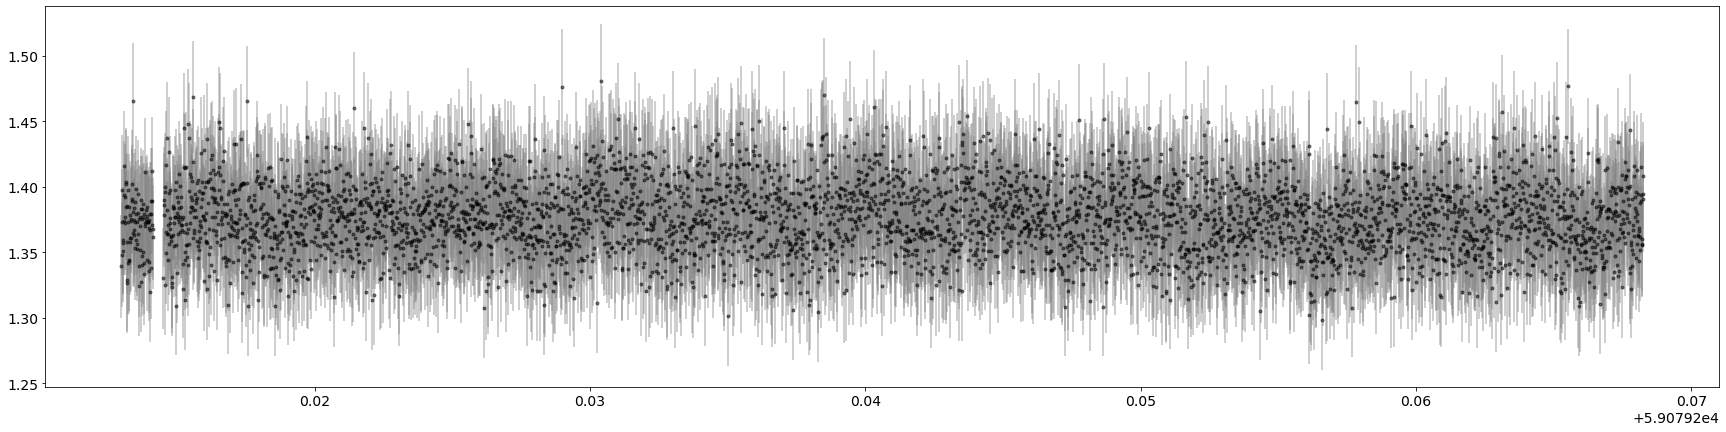

In [350]:
plt.figure(figsize=(30,7))
plt.errorbar(rtime, rf, rerrf, fmt='.k', ecolor='gray', alpha=0.5)

In [351]:
rerrf=rerrf/np.mean(rf)
rf=rf/np.mean(rf)

In [352]:
rmodel = LombScargle(fit_period=True)
rmodel.optimizer.period_range = (0.001, 0.01)
rmodel.fit(rtime,rf,rerrf)

Finding optimal frequency:
 - Estimated peak width = 114
 - Using 5 steps per peak; omega_step = 22.7
 - User-specified period range:  0.001 to 0.01
 - Computing periods at 250 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


In [353]:
rmodel.best_period

0.004773701052651607

In [354]:
rphase=(rtime/(0.004817624290148936)) %1
rphase2=(rtime/(0.004817624290148936*2)) %1

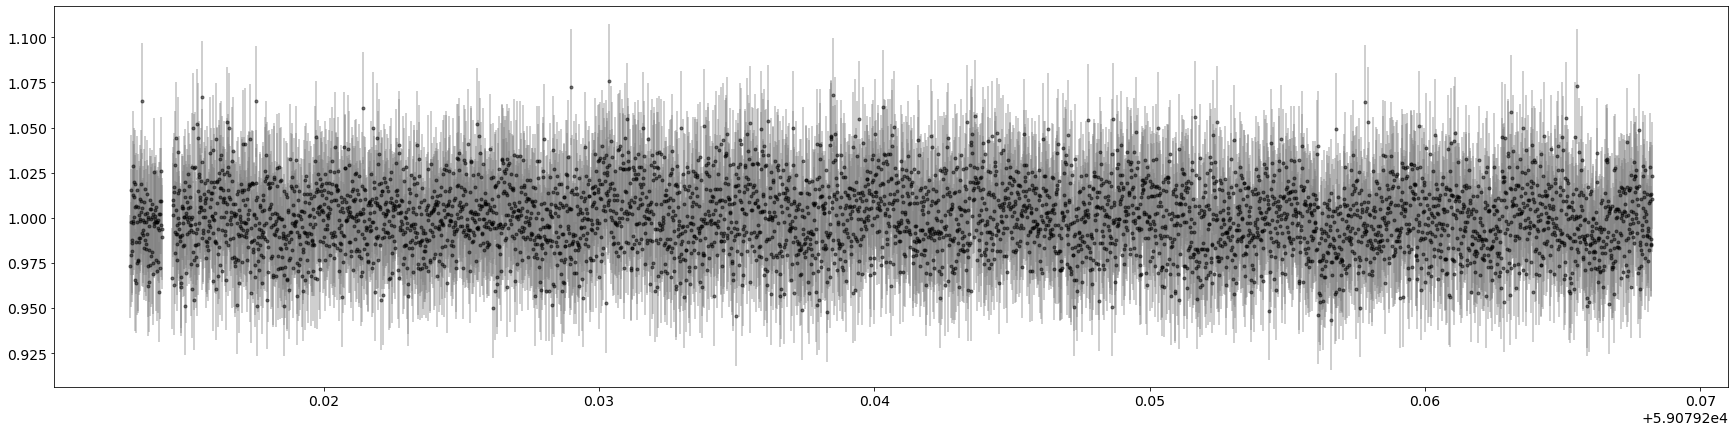

In [355]:
plt.figure(figsize=(30,7))
plt.errorbar(rtime, rf, rerrf, fmt='.k', ecolor='gray', alpha=0.5)
plt.savefig("Unfolded_red.pdf",bbox_inches='tight')

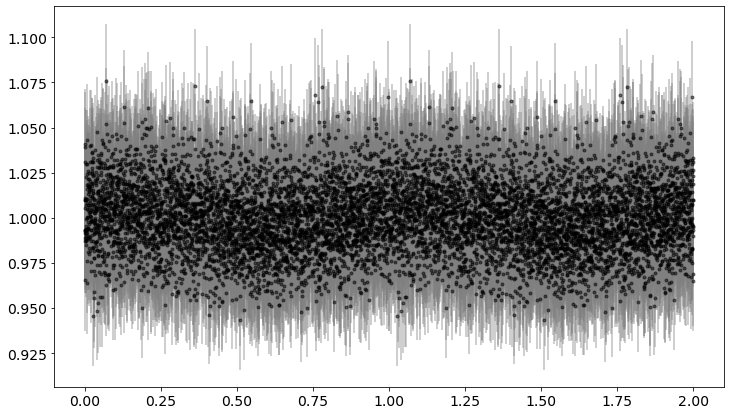

In [356]:
plt.figure(figsize=(12,7))
plt.errorbar(rphase, rf, rerrf, fmt='.k', ecolor='gray', alpha=0.5)
plt.errorbar(rphase+1, rf, rerrf, fmt='.k', ecolor='gray', alpha=0.5)
#plt.ylim(2.6,2.7)
plt.savefig("Folded_red.pdf",bbox_inches='tight')

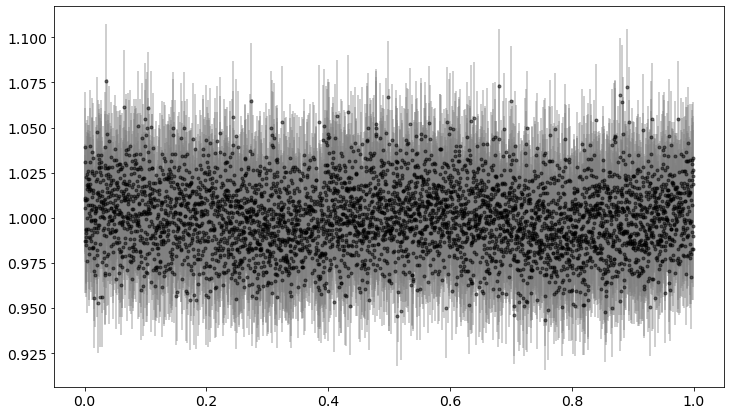

In [357]:
plt.figure(figsize=(12,7))
plt.errorbar(rphase2, rf, rerrf, fmt='.k', ecolor='gray', alpha=0.5)
plt.savefig("Folded_twice_red.pdf",bbox_inches='tight')

In [771]:
bins=np.linspace(0,1,55)
phase1= ((timerr-59079.21729018184)/(0.004817623604595463)) %1
#phase2= ((timeg-time[0])/(model.best_period*2)) %1
rbinsmid,rtf,retf=[],[],[]
for i in range(len(bins)-1):
    #print((bins[i+1]-bins[i])/2+bins[i])
    rbinsmid.append((bins[i+1]-bins[i])/2+bins[i])
    f1= rf[(phase1>bins[i])&(phase1<bins[i+1])]
    ef1=rerrf[(phase1>bins[i])&(phase1<bins[i+1])]
    rtf.append(np.mean(f1))
    retf.append(np.sqrt(np.sum(ef1**2))/len(ef1))

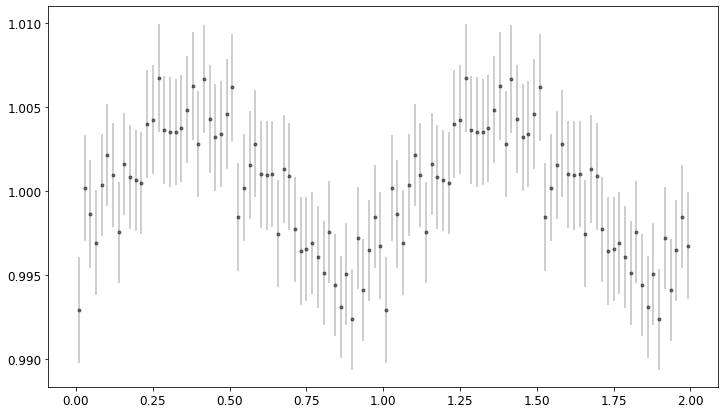

In [772]:
plt.figure(figsize=(12,7))
plt.errorbar(rbinsmid, rtf, retf, fmt='.k', ecolor='gray', alpha=0.5)
plt.errorbar(np.array(rbinsmid)+1, rtf, retf, fmt='.k', ecolor='gray', alpha=0.5)
plt.savefig("Binned_red.pdf",bbox_inches='tight')

In [360]:
bins=np.linspace(0,1,100)
phase22= ((rtime-rtime[0])/(model.best_period*2)) %1
#phase2= ((timeg-time[0])/(model.best_period*2)) %1
binsmid,tf,etf=[],[],[]
for i in range(len(bins)-1):
    #print((bins[i+1]-bins[i])/2+bins[i])
    binsmid.append((bins[i+1]-bins[i])/2+bins[i])
    f1= rf[(phase22>bins[i])&(phase22<bins[i+1])]
    ef1=rerrf[(phase22>bins[i])&(phase22<bins[i+1])]
    tf.append(np.mean(f1))
    etf.append(np.sqrt(np.sum(ef1**2))/len(ef1))

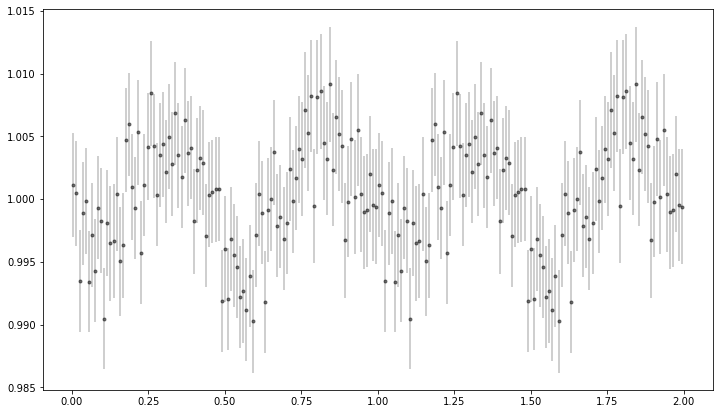

In [67]:
plt.figure(figsize=(12,7))
plt.errorbar(binsmid, tf, etf, fmt='.k', ecolor='gray', alpha=0.5)
plt.errorbar(np.array(binsmid)+1, tf, etf, fmt='.k', ecolor='gray', alpha=0.5)
plt.savefig("Binned_twice_red.pdf",bbox_inches='tight')

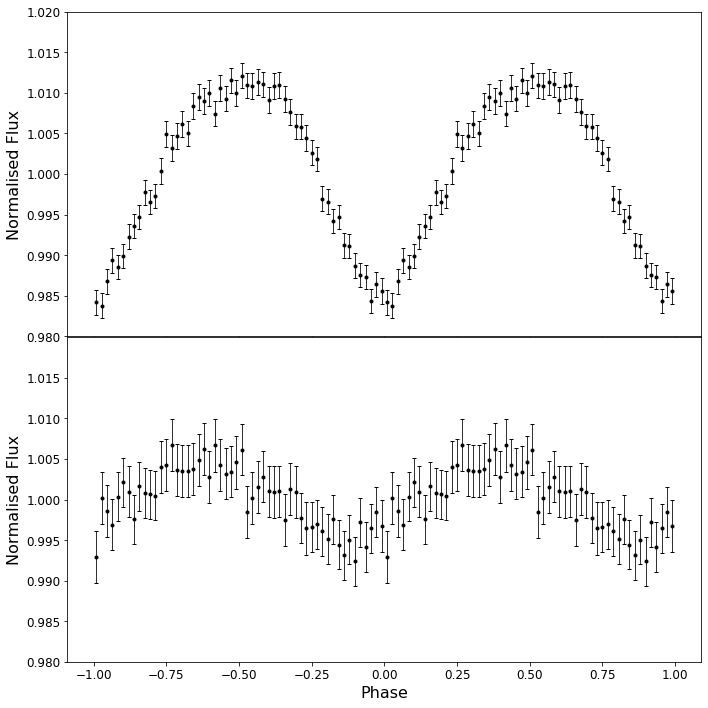

In [775]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
plt.rc('font', size=12) 
plt.rc('axes', labelsize=16)
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,10),gridspec_kw={'height_ratios': [1, 1]})

ax1.errorbar(binsmid, np.array(tf), etf, fmt='.k', elinewidth=0.8,capsize=2)
ax1.errorbar(np.array(binsmid)-1, np.array(tf), etf, fmt='.k',elinewidth=0.8,capsize=2)
ax1.set_ylim(0.98,1.02)
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_ylabel(r'Normalised Flux')
ax2.errorbar(rbinsmid, rtf, retf, fmt='.k',elinewidth=0.8,capsize=2)
ax2.errorbar(np.array(rbinsmid)-1, rtf, retf,fmt='.k',elinewidth=0.8,capsize=2)
ax2.set_ylim(0.98,1.02)
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_ylabel(r'Normalised Flux')
ax2.set_xlabel(r'Phase')

ax2.yaxis.set_major_locator(MaxNLocator(prune='upper'))
plt.tight_layout()
fig.subplots_adjust(hspace=0.003)

#plt.savefig("Binned.pdf",bbox_inches='tight')

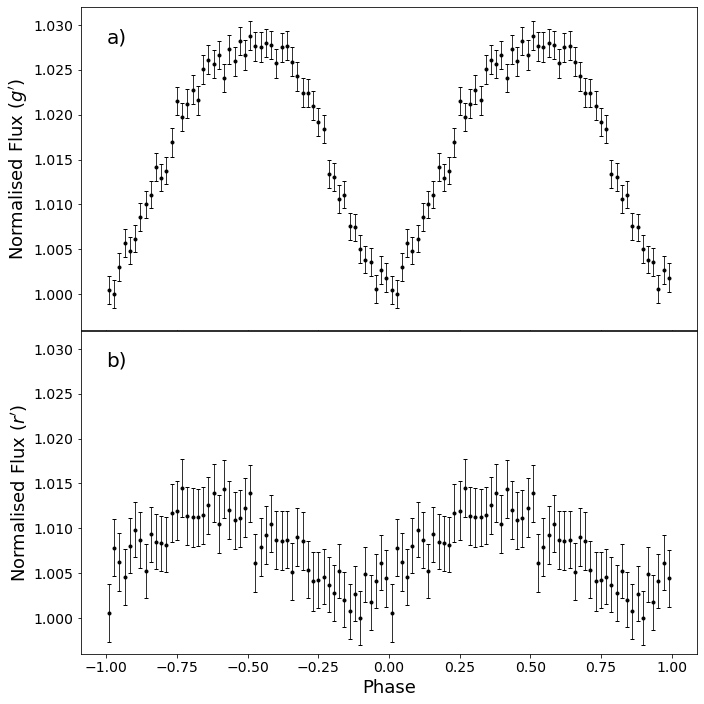

In [777]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
plt.rc('font', size=14) 
plt.rc('axes', labelsize=18)
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,10),gridspec_kw={'height_ratios': [1, 1]})

ax1.text(-1,1.028,'a)',rotation=0,size=20)
ax1.errorbar(binsmid, np.array(tf)/np.min(tf), etf/np.min(tf), fmt='.k', elinewidth=0.8,capsize=2)
ax1.errorbar(np.array(binsmid)-1, np.array(tf)/np.min(tf), etf/np.min(tf), fmt='.k',elinewidth=0.8,capsize=2)
ax1.set_ylim(0.996,1.032)
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_ylabel(r'Normalised Flux ($g^\prime$)')
ax2.text(-1,1.028,'b)',rotation=0,size=20)
ax2.errorbar(rbinsmid, rtf/np.min(rtf), retf/np.min(rtf), fmt='.k',elinewidth=0.8,capsize=2)
ax2.errorbar(np.array(rbinsmid)-1, rtf/np.min(rtf), retf/np.min(rtf),fmt='.k',elinewidth=0.8,capsize=2)
ax2.set_ylim(0.996,1.032)
#ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_ylabel(r'Normalised Flux ($r^\prime$)')
ax2.set_xlabel(r'Phase')
ax2.set_yticks([1.000,1.005,1.010,1.015,1.020,1.025,1.030])
#ax2.yaxis.set_major_locator(MaxNLocator(prune='upper'))
plt.tight_layout()
fig.subplots_adjust(hspace=0.003)

plt.savefig("CHIMERAbinned.pdf",bbox_inches='tight')

In [364]:
def sinusoid1(time,A,ph,C,B):
    return A*np.sin(2*np.pi*time/0.004817623614283364 +ph) + B*time + C 

In [365]:
def sinusoid2(time,A,ph,B,ph2,C,D):
    return A*np.sin(2*np.pi*time/0.004817623614283364 +ph) + B*np.sin(2*np.pi*time/0.004817623614283364 +ph2) + C*time + D 

In [366]:
2*np.pi/0.004817623614283364

1304.2084251976644

In [367]:
from scipy.optimize import curve_fit

In [368]:
res2=curve_fit(sinusoid2,np.array(timeb)-timeb[0],f,p0=[0.3,0,0.3,0,-0.1,1.0])

In [369]:
res2

(array([-0.00970552,  1.20158083, -0.01355697, -0.81610299, -0.14947709,
         1.00442469]),
 array([[ 3.37782269e+04, -2.93547377e+06,  4.02900821e+04,
          1.33869831e+06,  4.96637996e-03,  5.99417880e-05],
        [-2.93542776e+06,  1.38442852e+09, -1.33856566e+07,
          2.33061820e+08, -9.04942354e+00,  2.83075595e-01],
        [ 4.02896795e+04, -1.33856765e+07,  1.34568489e+05,
         -1.46131865e+06,  8.13504774e-02, -2.45168782e-03],
        [ 1.33871254e+06,  2.33058760e+08, -1.46128571e+06,
          1.61155093e+08, -2.46941013e+00,  9.15670733e-02],
        [ 4.96602890e-03, -9.04939979e+00,  8.13501179e-02,
         -2.46942614e+00,  8.21426175e-05, -2.28506860e-06],
        [ 5.99535318e-05,  2.83074492e-01, -2.45167310e-03,
          9.15675135e-02, -2.28506860e-06,  8.42750918e-08]]))

In [370]:
bestfit,bestcov=curve_fit(sinusoid1,np.array(timeb)-timeb[0],f,p0=[0.3,0,1.0,-0.1],sigma=errf)

In [371]:
bestfit,np.sqrt(np.diag(bestcov))

(array([-0.0128249 , -0.0644526 ,  1.00434714, -0.14919288]),
 array([0.000204  , 0.01582131, 0.00029015, 0.00904251]))

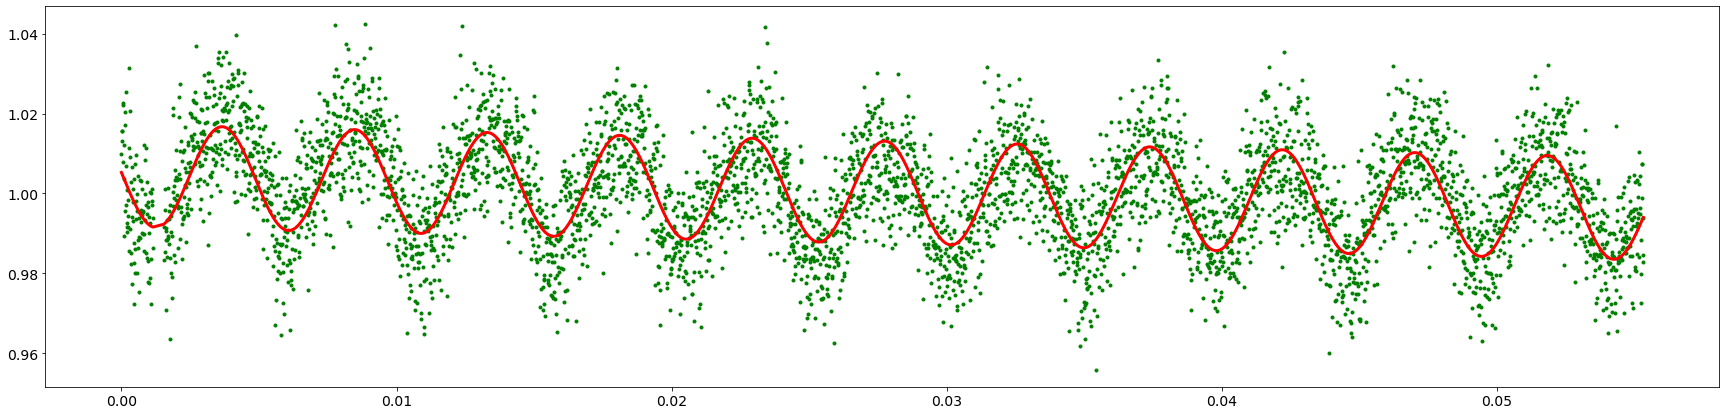

In [372]:
plt.figure(figsize=(30,7))
plt.plot(np.array(timeb)-timeb[0],f,'g.')
plt.plot(np.array(timeb)-timeb[0], sinusoid1(np.array(timeb)-timeb[0],-0.01281675, -0.06437655,  1.00442469, -0.14947714))
plt.plot(np.array(timeb)-timeb[0], sinusoid2(np.array(timeb)-timeb[0],-0.00970552,  1.20158083, -0.01355697, -0.81610299, -0.14947709,
         1.00442469),'r',linewidth=3)

In [373]:
2*np.pi*(np.array(timeb)-timeb[0])/0.004817623614283364

array([0.00000000e+00, 1.51051241e-02, 3.02102387e-02, ...,
       7.21199657e+01, 7.21350708e+01, 7.21501760e+01])

In [374]:
0.0644526*0.004817623614283364/2/np.pi +timeb[0]

59079.21608577569

In [375]:
24*60*60*0.01582254*0.004817623614283364/2/np.pi

1.0481970746300069

In [376]:
timegt,maggt,errmaggt=np.loadtxt("../../ZTF/285.3869388_14.9690803_g_10539531058645",unpack=True)

In [377]:
timeg,magg,magerrg=np.loadtxt("forced.dat",unpack=True,usecols=(0,1,2))

In [378]:
timeg=timeg[magg<4]
magerrg=magerrg[magg<4]
magg=magg[magg<4]
len(timeg),len(timeb),len(magg)

(4699, 4699, 4699)

In [702]:
timetot= np.concatenate([np.array(timegt)-2400000.5+15/60/60/24,timeb])
magtot= np.concatenate([maggt-np.median(maggt)+np.median(magg),magg])
errmagtot= np.concatenate([errmaggt,magerrg])
magtot=magtot[np.argsort(timetot)]
errmagtot=errmagtot[np.argsort(timetot)]
timetot=timetot[np.argsort(timetot)]

(59079.21, 59079.28)

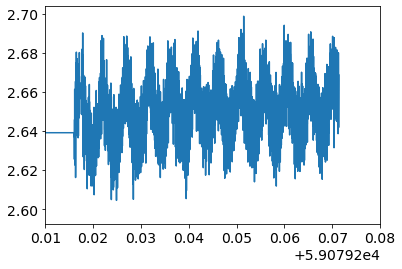

In [703]:
plt.plot(timetot,magtot)
plt.xlim(59079.21,59079.28)

In [704]:
bestfit,bestcov=curve_fit(sinusoid1,np.array(timetot)-timetot[0],magtot,p0=[0.02,0.1,2.66,0.0],sigma=errmagtot)

In [705]:
bestfit,np.sqrt(np.diag(bestcov)),timetot[0]

(array([-1.39954287e-02,  4.97349951e-01,  2.64743966e+00,  2.24540678e-06]),
 array([2.25088961e-04, 1.59434114e-02, 1.23926395e-03, 1.43401524e-06]),
 58204.507043611266)

(874.7031300000017, 874.7731300000014)

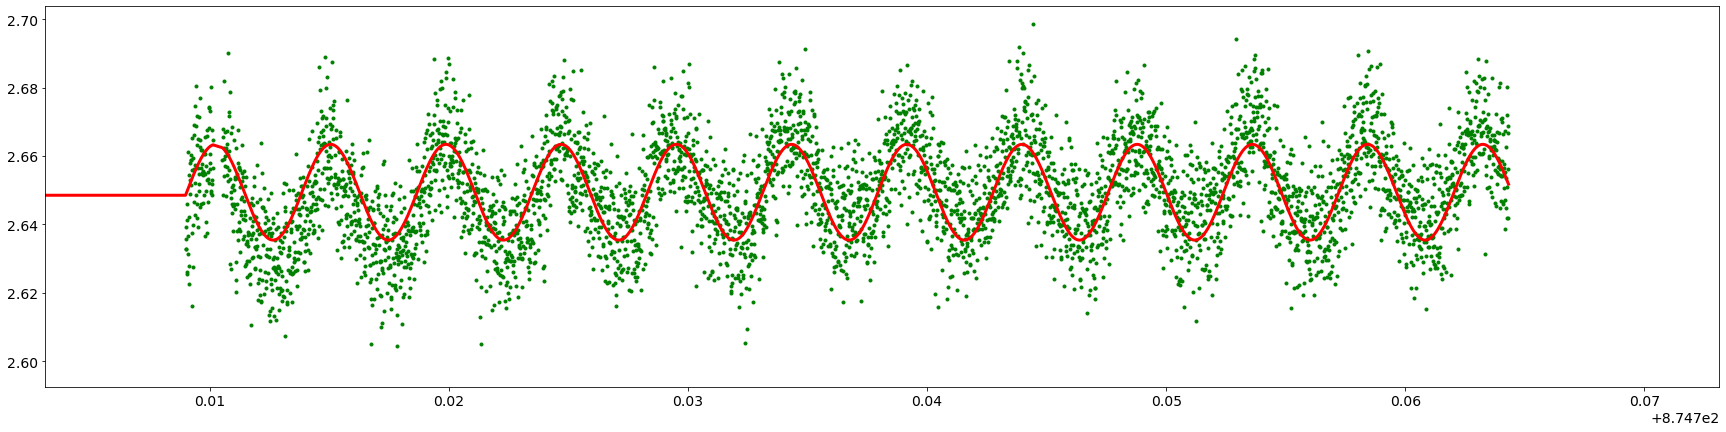

In [706]:
plt.figure(figsize=(30,7))
plt.plot(timetot-timetot[0],magtot,'g.')
plt.plot(timetot-timetot[0], sinusoid1(timetot-timetot[0],-1.39954287e-02,  4.97349951e-01,  2.64743966e+00,  2.24540678e-06),'r',linewidth=3)
plt.xlim(59079.21-58204.50687,59079.28-58204.50687)

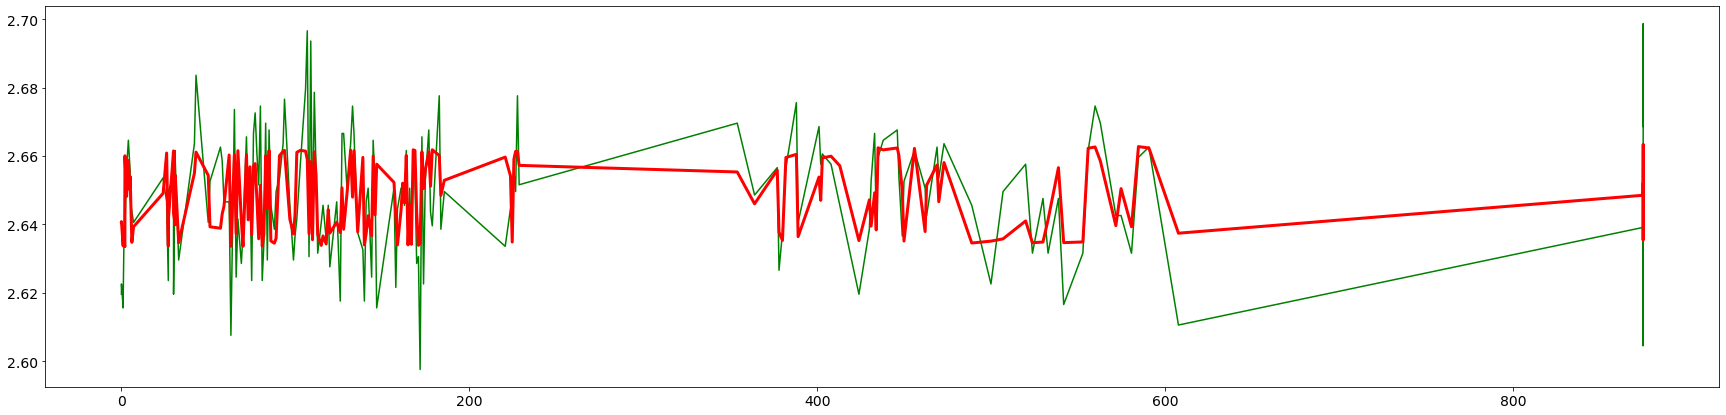

In [709]:
plt.figure(figsize=(30,7))
plt.plot(timetot-timetot[0],magtot,'g')
plt.plot(timetot-timetot[0], sinusoid1(timetot-timetot[0],-1.39954287e-02,  4.97349951e-01,  2.64743966e+00,  2.24540678e-06),'r',linewidth=3)
#plt.xlim(59079.21-58204.50687,59079.28-58204.50687)

In [686]:
((-np.pi/2-2.76497267e-01)*4.81762484e-03/2/np.pi +timetot[0]-58204.50523517509)/4.81762484e-03

0.045336636309814826

In [433]:
(59079.21608577569-58204.511475619875)/0.004817623614283364

181563.50105111528

In [687]:
fZ=10**(-maggt/2.5)
errfZ=np.log(10)*10**(-maggt/2.5)/2.5*errmaggt
errfZ=errfZ/np.mean(fZ)
fZ=fZ/np.mean(fZ)
fZ,errfZ,errf

(array([1.02263952, 0.99844138, 1.02358184, 1.00212655, 0.98021777,
        0.97571408, 1.00860838, 0.98202506, 1.01233108, 1.02641401,
        0.95878796, 1.02735981, 1.00582533, 0.99111163, 0.95614238,
        1.01606752, 0.97123108, 1.01700379, 1.01046801, 1.01700379,
        0.98564965, 1.03020243, 0.99476975, 1.01046801, 0.9739184 ,
        1.00120399, 1.0188789 , 0.992939  , 1.00675216, 0.98292995,
        0.97212603, 1.00120399, 1.00212655, 0.98292995, 1.01139912,
        0.99844138, 1.00675216, 1.02263952, 1.00028227, 0.98474225,
        1.00397424, 1.00120399, 1.00860838, 0.992939  , 0.99844138,
        1.01513212, 1.00212655, 0.99660387, 0.97661316, 1.02452502,
        1.00860838, 1.00953777, 1.01794091, 0.99568639, 0.992939  ,
        1.02169806, 0.97751306, 1.00304997, 1.02263952, 0.98837686,
        0.98655788, 0.99385396, 0.9901992 , 0.98021777, 0.98292995,
        0.99660387, 0.98837686, 0.98383568, 0.99385396, 1.00767984,
        0.9730218 , 1.01700379, 0.96765951, 1.00

In [749]:
timetot= np.concatenate([np.array(timegt)-2400000.5+15.0/60/60/24,timeb])
ftot= np.concatenate([fZ,f])
errftot= np.concatenate([errfZ,errf])
ftot=ftot[np.argsort(timetot)]
errftot=errftot[np.argsort(timetot)]
timetot=timetot[np.argsort(timetot)]

(59079.21, 59079.28)

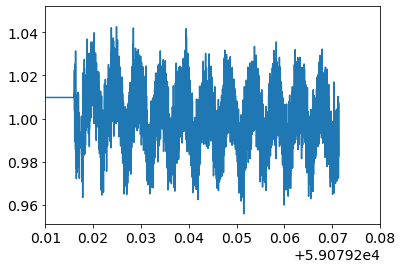

In [750]:
plt.plot(timetot,ftot)
plt.xlim(59079.21,59079.28)

In [751]:
bestfit,bestcov=curve_fit(sinusoid1,np.array(timetot)-timetot[0],ftot,p0=[0.02,0.1,1,0.0],sigma=errftot)

In [752]:
bestfit,np.sqrt(np.diag(bestcov)),timetot[0]

(array([1.29041678e-02, 4.97578359e-01, 9.99813957e-01, 4.27607269e-07]),
 array([2.07058042e-04, 1.59362296e-02, 1.14065864e-03, 1.31991665e-06]),
 58204.507043611266)

(874.7031300000017, 874.7731300000014)

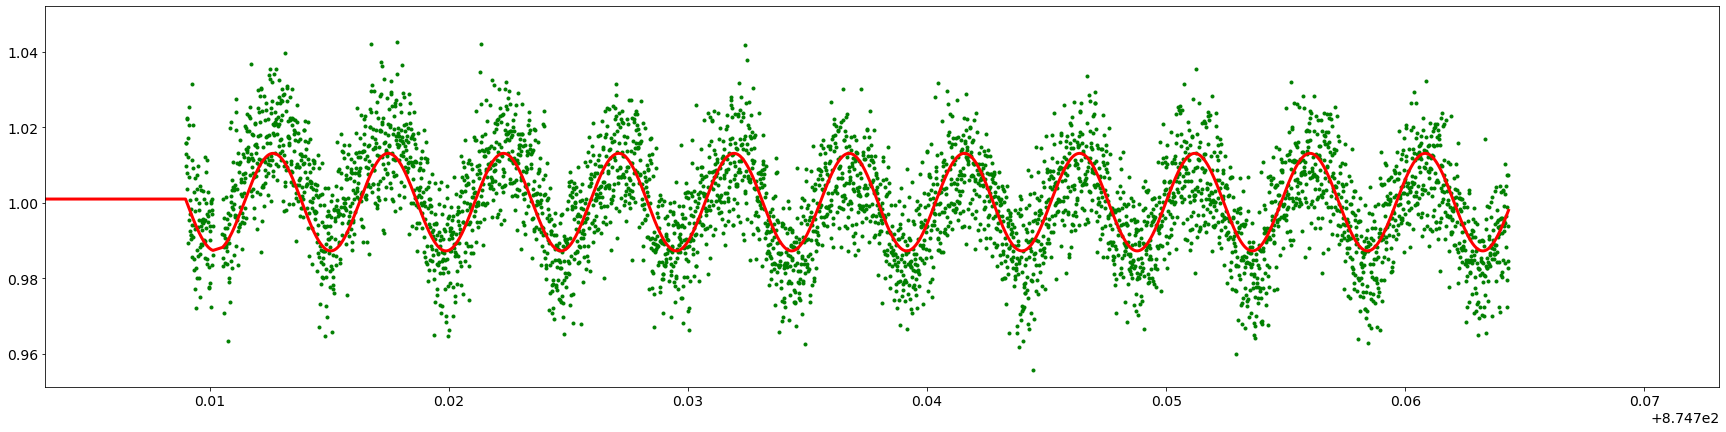

In [753]:
plt.figure(figsize=(30,7))
plt.plot(timetot-timetot[0],ftot,'g.')
plt.plot(timetot-timetot[0], sinusoid1(timetot-timetot[0],1.29041678e-02, 4.97578359e-01, 9.99813957e-01, 4.27607269e-07),'r',linewidth=3)
plt.xlim(59079.21-58204.50687,59079.28-58204.50687)

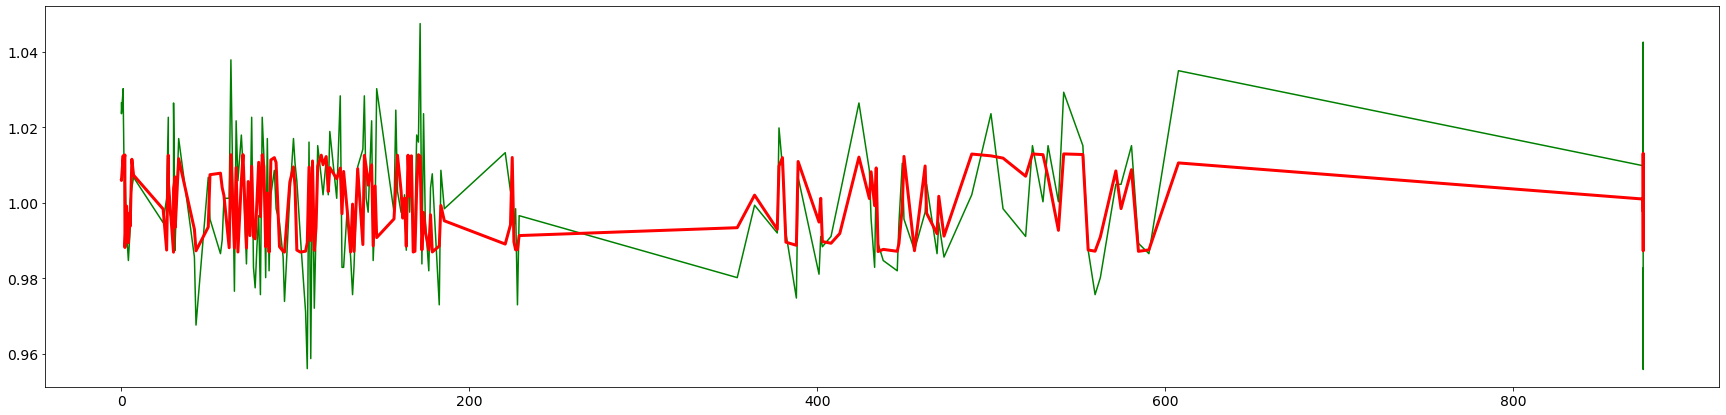

In [754]:
plt.figure(figsize=(30,7))
plt.plot(timetot-timetot[0],ftot,'g')
plt.plot(timetot-timetot[0], sinusoid1(timetot-timetot[0],1.29041678e-02, 4.97578359e-01, 9.99813957e-01, 4.27607269e-07),'r',linewidth=3)
#plt.xlim(59079.21-58204.50687,59079.28-58204.50687)

In [745]:
(58204.50622996193-(-np.pi/2-4.97578359e-01)*4.81762367e-03/2/np.pi -timetot[0])*24*60*60

66.72448280733079

In [395]:
(59079.21608577569-58204.51147534709)/0.004817623614283364

181563.50110773716

In [396]:
errftot

array([0.01701652, 0.01696957, 0.01707933, ..., 0.01438531, 0.01429685,
       0.01427505])

In [397]:
timetot[0]

58204.50687000016

In [440]:
timer,magr,errmagr=np.loadtxt("../../ZTF/285.3869388_14.9690803_r_10539532030398",unpack=True)

In [441]:
timerr=np.loadtxt("Timestamps_Red",unpack=True)

In [442]:
rfZ=10**(-magr/2.5)
rerrfZ=np.log(10)*10**(-magr/2.5)/2.5*errmagr
rerrfZ=rerrfZ/np.mean(rfZ)
rfZ=rfZ/np.mean(rfZ)

In [716]:
rtimetot= np.concatenate([np.array(timer)-2400000.5+15.0/60/60/24,timerr])
rftot= np.concatenate([rfZ,rf])
rerrftot= np.concatenate([rerrfZ,rerrf])
rftot=rftot[np.argsort(rtimetot)]
rerrftot=rerrftot[np.argsort(rtimetot)]
rtimetot=rtimetot[np.argsort(rtimetot)]

(59079.21, 59079.28)

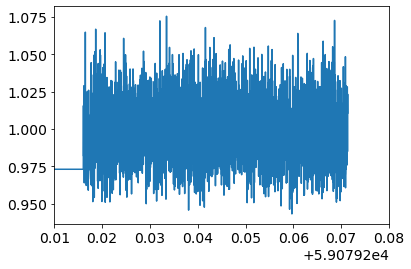

In [717]:
plt.plot(rtimetot,rftot)
plt.xlim(59079.21,59079.28)

In [718]:
bestfit,bestcov=curve_fit(sinusoid1,np.array(rtimetot)-rtimetot[0],rftot,p0=[0.02,0.1,1,0.0],sigma=rerrftot)

In [719]:
bestfit,np.sqrt(np.diag(bestcov)),rtimetot[0]

(array([ 4.94930592e-03, -7.68685732e-01,  9.99242593e-01,  1.40312779e-07]),
 array([3.41339994e-04, 7.01232525e-02, 6.23097926e-04, 8.28419957e-07]),
 58216.51107361122)

(862.6990999998889, 862.7690999998886)

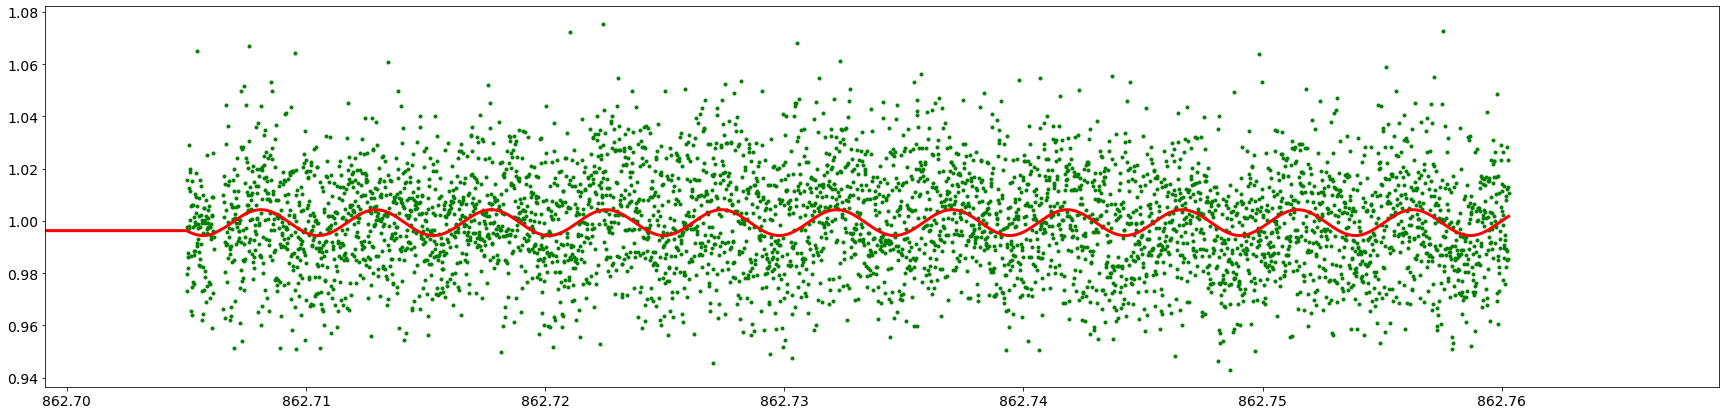

In [720]:
plt.figure(figsize=(30,7))
plt.plot(rtimetot-rtimetot[0],rftot,'g.')
plt.plot(rtimetot-rtimetot[0], sinusoid1(rtimetot-rtimetot[0],4.94930592e-03, -7.68685732e-01,  9.99242593e-01,  1.40312779e-07),'r',linewidth=3)
plt.xlim(59079.21-58216.51090000011,59079.28-58216.51090000011)

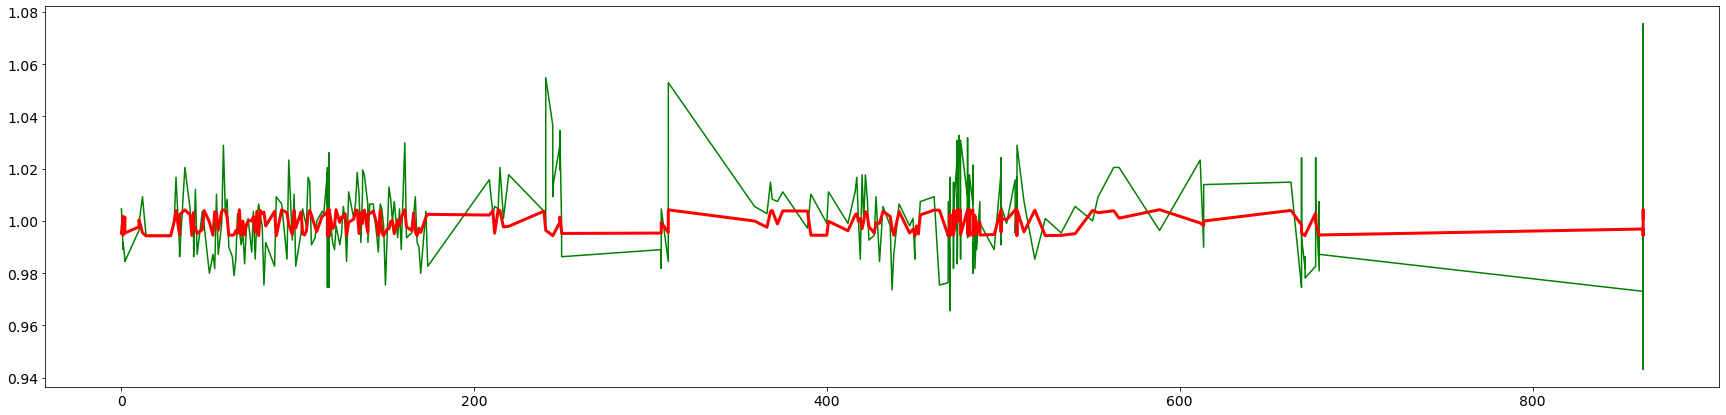

In [721]:
plt.figure(figsize=(30,7))
plt.plot(rtimetot-rtimetot[0],rftot,'g')
plt.plot(rtimetot-rtimetot[0], sinusoid1(rtimetot-rtimetot[0],4.99393727e-03, -9.25947031e-01,  9.99284719e-01,  8.49960178e-08),'r',linewidth=3)
#plt.xlim(59079.21-58204.50687,59079.28-58204.50687)

In [763]:
(-np.pi/2+9.25947031e-01)*4.81762484e-03/2/np.pi +timetot[0]

58204.506549173835

In [765]:
(58204.50674483675-58204.50654917383)*60*60*24

16.905276314355433

In [701]:
(9.25947031e-011-np.pi/2)*4.81762484e-03/2/np.pi +rtimetot[0]

58216.5096955939

In [466]:
(58216.51090000011-58204.50687000016)/0.004817623614283364

2491.691124305152

(59079.21, 59079.28)

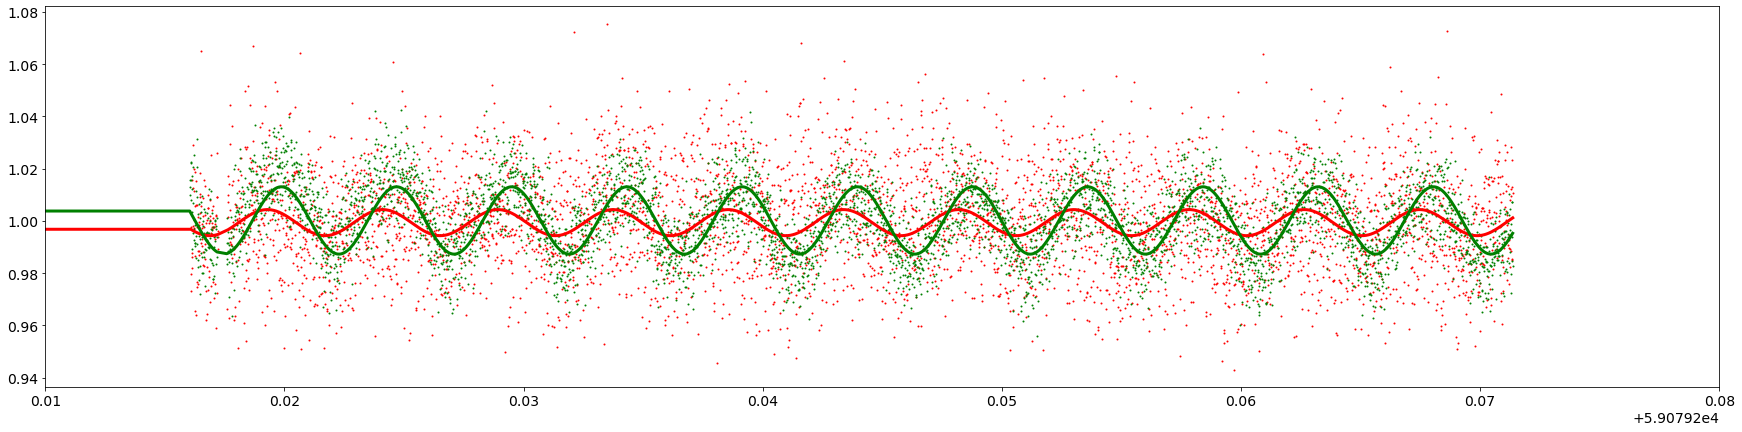

In [723]:
plt.figure(figsize=(30,7))
plt.plot(rtimetot,rftot,'r.',markersize=2)
plt.plot(timetot,ftot,'g.',markersize=2)
plt.plot(rtimetot, sinusoid1(rtimetot-rtimetot[0],4.99627780e-03, -9.04257871e-01,  9.99279850e-01,  8.66258766e-08),'r',linewidth=3)
plt.plot(timetot, sinusoid1(timetot-timetot[0],1.28910972e-02, 2.76853039e-01, 9.99700671e-01, 5.56783726e-07),'g',linewidth=3)
#plt.plot(timetot-0.683273306*0.004817623614283364/2/np.pi, sinusoid1(timetot-timetot[0],1.28910972e-02, 2.76853039e-01, 9.99700671e-01, 5.56783726e-07),'r',linewidth=3)
plt.xlim(59079.21,59079.28)

In [506]:
timetot[-1],rtimetot[0]

(59079.271357404024, 58216.51090000011)

In [518]:
factor=59091-rtimetot[0]
factor

874.4890999998897

In [641]:
def fitall(time,period,a0,phi0,c0,b0,a1,phi1,c1,b1):
    res=np.where(time<59090,a0*np.sin((time-time[0])*2*np.pi/period-phi0)+c0+b0*(time-time[0]),a1*np.sin((time-factor-time[0])*2*np.pi/period-phi1)+c1+b1*(time-factor-time[0]))
    return res

In [724]:
timeall= np.concatenate([timetot,rtimetot+factor])
fall= np.concatenate([ftot,rftot])
errfall= np.concatenate([errftot,rerrftot])
#fall=rftot[np.argsort(timet)]
#errfall=rerrftot[np.argsort(timet)]
#timeall=rtimetot[np.argsort(timet)]

(59079.271357404024, 59090.99999999999)

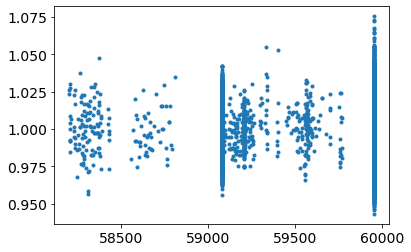

In [725]:
plt.plot(timeall,fall,'.')
timetot[-1],rtimetot[0]+59091-rtimetot[0]

In [755]:
bestfit,bestcov=curve_fit(fitall,timeall,fall,p0=[0.004817627676314446,
                                                  1.29041678e-02, 4.97578359e-01, 9.99813957e-01, 4.27607269e-07,
                                                 4.94930592e-03, -7.68685732e-01,  9.99242593e-01,  1.40312779e-07],sigma=errfall)

In [756]:
bestfit,np.sqrt(np.diag(bestcov)),rtimetot[0]

(array([ 4.81762366e-03,  1.29047133e-02, -5.09134556e-01,  9.99819025e-01,
         4.21796325e-07,  4.94727061e-03, -1.18113209e+00,  9.99238522e-01,
         1.43251636e-07]),
 array([4.74745914e-10, 2.02348568e-04, 1.09972254e-01, 1.11357988e-03,
        1.28856370e-06, 3.49939239e-04, 1.16539080e-01, 6.48571560e-04,
        8.49726404e-07]),
 58216.51107361122)

In [566]:
0.004817627676314446*24*60*60,4.81762484e-03*60*24*60,4.68130200e-10*24*60*60

(416.2430312335681, 416.2427861759999, 4.044644928e-05)

In [758]:
(1.18113209e+00-5.09134556e-01)/2/np.pi*4.81762367e-03*60*24*60

44.517874971004694

In [759]:
1.09972254e-01*4.81762484e-03/2/np.pi,1.16539080e-01*4.81762484e-03/2/np.pi

(8.432109458490723e-05, 8.935620058781437e-05)

In [760]:
(-np.pi/2+5.09134556e-01)*4.81762367e-03/2/np.pi +timeall[0]

58204.50622958357

In [612]:
58204.50730041901+874*4.81762484e-03

58208.71790452917

In [761]:
(-np.pi/2+1.18113209e+00)*4.81762367e-03/2/np.pi +timeall[0] 

58204.50674483675

In [762]:
(58204.50674483675-58204.50622958357)*60*24*60

44.51787485741079

In [623]:
timeb[0]-58204.50730041901

874.7087359377329

In [624]:
timeall[0]

58204.50687000016

In [559]:
5.*8.*np.pi**2*(8.e8)**2*(1800*1e5)**4/(3*2*1.35*2e33*(3e10)**3)/(0.0048176236050345884*24*60*60)

1.4568147965215261e-15

In [560]:
20*np.pi**2*(8e8)**2*(1800*1e5)**4/(3*1.35*2e33*(3e10)**3*(0.0048176236050345884*24*60*60))

1.4568147965215261e-15

In [561]:
4*np.pi**2*(2/5)*1.35*2e33*(1800*1e5)**2/(0.0048176236050345884*24*60*60)**2*20*np.pi**2*(8e8)**2*(1800*1e5)**4/(3*1.35*2e33*(3e10)**3*(0.004817623614283364*24*60*60))

1.1615545978832878e+31

In [562]:
(0.004817623580158933*24*60*60)/2/1.4568148040437458e-15

1.4286053250226058e+17

In [563]:
(1.4286053250226058e+17)/(np.pi*1e7)

4547391984.095029